# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

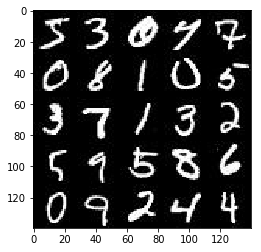

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

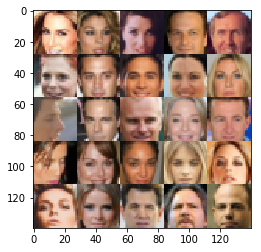

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/juanmi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name='input_real')
    input_z = tf.placeholder(tf.float32, [None, z_dim], name='input_z')
    lr = tf.placeholder(tf.float32, name='lr')

    return input_real, input_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [9]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        ##input 28x28

        x1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        relu1 = tf.maximum(0.2*x1, x1)
        ## 14x14
        
        x2 = tf.layers.conv2d(relu1, 64, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2*bn2,bn2)
        ## 7x7x64
        
        x3 = tf.layers.conv2d(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2*bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 4*4*128))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        

    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [10]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # Parameter with value function signature for leaky relu
    alpha = 0.2
    
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        
        #first fully connected
        x1 = tf.layers.dense(z, 2*2*128)
        x1 = tf.reshape(x1, (-1, 2, 2, 128))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1,x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 64,5,strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 32, 4, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 4, strides=2, padding='same')
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [11]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    # GANs Build
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    # Calculating loss 
    d_loss_real = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits = d_logits_real,
                                                                           labels = tf.ones_like(d_model_real)
                                                                         )
                                )
    d_loss_fake = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits= d_logits_fake,
                                                                           labels = tf.zeros_like(d_model_fake)
                                                                         )
                                )
    g_loss = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits = d_logits_fake,
                                                                      labels= tf.ones_like(d_model_fake)
                                                                    )
                           )
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [12]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [18]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                steps += 1
                # Rescale
                batch_images *= 2
                
                # Noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Optimizers
                _ = sess.run([d_train_opt, g_train_opt], 
                             feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                # Print progress
                if steps % 10 == 0:
                    #updates on losses
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    if steps % 100 == 0:
                        #current generated image
                        show_generator_output(sess, 50, input_z, data_shape[3], data_image_mode)                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6662... Generator Loss: 0.8824
Epoch 1/2... Discriminator Loss: 0.0504... Generator Loss: 10.5291
Epoch 1/2... Discriminator Loss: 3.4774... Generator Loss: 0.0513
Epoch 1/2... Discriminator Loss: 1.4878... Generator Loss: 7.6310
Epoch 1/2... Discriminator Loss: 1.0911... Generator Loss: 4.2503
Epoch 1/2... Discriminator Loss: 0.7089... Generator Loss: 4.2006
Epoch 1/2... Discriminator Loss: 0.3201... Generator Loss: 2.2853
Epoch 1/2... Discriminator Loss: 0.0643... Generator Loss: 4.7324
Epoch 1/2... Discriminator Loss: 1.5040... Generator Loss: 0.3090
Epoch 1/2... Discriminator Loss: 0.9218... Generator Loss: 0.6661


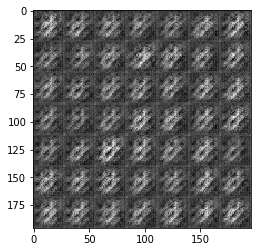

Epoch 1/2... Discriminator Loss: 0.5467... Generator Loss: 6.1920
Epoch 1/2... Discriminator Loss: 0.5837... Generator Loss: 8.2587
Epoch 1/2... Discriminator Loss: 0.0925... Generator Loss: 3.6575
Epoch 1/2... Discriminator Loss: 0.1343... Generator Loss: 3.2735
Epoch 1/2... Discriminator Loss: 1.0349... Generator Loss: 0.6386
Epoch 1/2... Discriminator Loss: 0.6545... Generator Loss: 1.0499
Epoch 1/2... Discriminator Loss: 0.8409... Generator Loss: 4.0355
Epoch 1/2... Discriminator Loss: 0.4952... Generator Loss: 3.4837
Epoch 1/2... Discriminator Loss: 0.4395... Generator Loss: 2.2789
Epoch 1/2... Discriminator Loss: 0.6513... Generator Loss: 3.5266


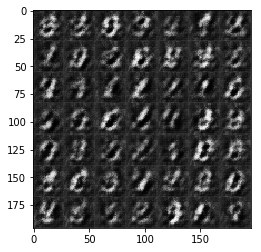

Epoch 1/2... Discriminator Loss: 0.9237... Generator Loss: 5.9531
Epoch 1/2... Discriminator Loss: 1.7918... Generator Loss: 0.3345
Epoch 1/2... Discriminator Loss: 0.8982... Generator Loss: 0.8124
Epoch 1/2... Discriminator Loss: 1.0700... Generator Loss: 0.5589
Epoch 1/2... Discriminator Loss: 1.6878... Generator Loss: 0.2676
Epoch 1/2... Discriminator Loss: 0.8883... Generator Loss: 0.7006
Epoch 1/2... Discriminator Loss: 0.7368... Generator Loss: 1.0154
Epoch 1/2... Discriminator Loss: 0.8402... Generator Loss: 0.8165
Epoch 1/2... Discriminator Loss: 0.8785... Generator Loss: 0.7361
Epoch 1/2... Discriminator Loss: 0.7007... Generator Loss: 1.1364


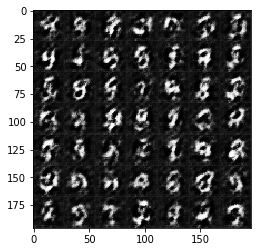

Epoch 1/2... Discriminator Loss: 0.8600... Generator Loss: 0.7478
Epoch 1/2... Discriminator Loss: 1.3262... Generator Loss: 0.4634
Epoch 1/2... Discriminator Loss: 0.6695... Generator Loss: 1.0052
Epoch 1/2... Discriminator Loss: 0.9722... Generator Loss: 0.6996
Epoch 1/2... Discriminator Loss: 0.9243... Generator Loss: 0.6575
Epoch 1/2... Discriminator Loss: 0.8476... Generator Loss: 0.7799
Epoch 1/2... Discriminator Loss: 0.7276... Generator Loss: 1.2336
Epoch 1/2... Discriminator Loss: 0.4903... Generator Loss: 1.4305
Epoch 1/2... Discriminator Loss: 0.8514... Generator Loss: 0.8414
Epoch 1/2... Discriminator Loss: 1.0340... Generator Loss: 0.5836


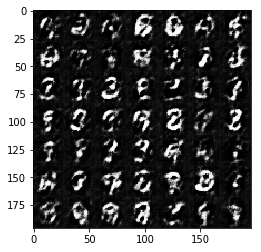

Epoch 1/2... Discriminator Loss: 0.6991... Generator Loss: 0.9665
Epoch 1/2... Discriminator Loss: 0.8529... Generator Loss: 0.7494
Epoch 1/2... Discriminator Loss: 0.8668... Generator Loss: 0.7493
Epoch 1/2... Discriminator Loss: 1.7470... Generator Loss: 0.2491
Epoch 1/2... Discriminator Loss: 0.3626... Generator Loss: 2.1085
Epoch 1/2... Discriminator Loss: 0.7865... Generator Loss: 4.1795
Epoch 1/2... Discriminator Loss: 0.9424... Generator Loss: 3.4087
Epoch 1/2... Discriminator Loss: 0.4813... Generator Loss: 1.5176
Epoch 1/2... Discriminator Loss: 0.6381... Generator Loss: 1.0337
Epoch 1/2... Discriminator Loss: 0.5980... Generator Loss: 1.0532


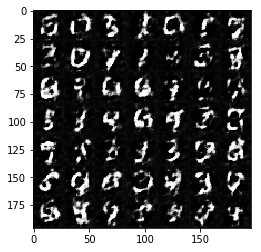

Epoch 1/2... Discriminator Loss: 2.3114... Generator Loss: 0.1656
Epoch 1/2... Discriminator Loss: 0.7122... Generator Loss: 0.9003
Epoch 1/2... Discriminator Loss: 0.5553... Generator Loss: 1.5369
Epoch 1/2... Discriminator Loss: 0.4063... Generator Loss: 1.8631
Epoch 1/2... Discriminator Loss: 0.8948... Generator Loss: 4.2357
Epoch 1/2... Discriminator Loss: 0.5212... Generator Loss: 1.4420
Epoch 1/2... Discriminator Loss: 1.0745... Generator Loss: 0.5893
Epoch 1/2... Discriminator Loss: 0.9081... Generator Loss: 0.6985
Epoch 1/2... Discriminator Loss: 0.4770... Generator Loss: 2.7301
Epoch 1/2... Discriminator Loss: 1.2388... Generator Loss: 0.4763


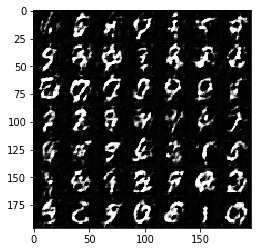

Epoch 1/2... Discriminator Loss: 0.8513... Generator Loss: 0.7816
Epoch 1/2... Discriminator Loss: 1.4234... Generator Loss: 0.3925
Epoch 1/2... Discriminator Loss: 0.7256... Generator Loss: 0.9271
Epoch 1/2... Discriminator Loss: 0.9458... Generator Loss: 0.6964
Epoch 1/2... Discriminator Loss: 1.4669... Generator Loss: 0.3869
Epoch 1/2... Discriminator Loss: 1.6762... Generator Loss: 0.3285
Epoch 1/2... Discriminator Loss: 0.6921... Generator Loss: 1.0719
Epoch 1/2... Discriminator Loss: 1.0413... Generator Loss: 0.6057
Epoch 1/2... Discriminator Loss: 0.6233... Generator Loss: 1.0491
Epoch 1/2... Discriminator Loss: 0.4984... Generator Loss: 1.7396


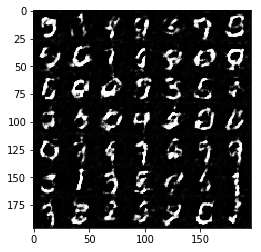

Epoch 1/2... Discriminator Loss: 1.0633... Generator Loss: 3.9304
Epoch 1/2... Discriminator Loss: 0.4950... Generator Loss: 1.6975
Epoch 1/2... Discriminator Loss: 0.6178... Generator Loss: 2.4836
Epoch 1/2... Discriminator Loss: 0.4039... Generator Loss: 2.8650
Epoch 1/2... Discriminator Loss: 1.3084... Generator Loss: 3.8938
Epoch 1/2... Discriminator Loss: 0.5456... Generator Loss: 1.4814
Epoch 1/2... Discriminator Loss: 1.1564... Generator Loss: 0.5175
Epoch 1/2... Discriminator Loss: 1.6559... Generator Loss: 0.2901
Epoch 1/2... Discriminator Loss: 0.9517... Generator Loss: 0.6606
Epoch 1/2... Discriminator Loss: 1.4830... Generator Loss: 0.3740


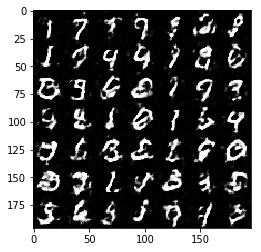

Epoch 1/2... Discriminator Loss: 0.5962... Generator Loss: 1.2119
Epoch 1/2... Discriminator Loss: 1.1875... Generator Loss: 0.4519
Epoch 1/2... Discriminator Loss: 1.1704... Generator Loss: 0.5417
Epoch 1/2... Discriminator Loss: 0.6192... Generator Loss: 1.0306
Epoch 1/2... Discriminator Loss: 0.6625... Generator Loss: 1.7538
Epoch 1/2... Discriminator Loss: 2.1789... Generator Loss: 0.1624
Epoch 1/2... Discriminator Loss: 1.2360... Generator Loss: 3.2951
Epoch 1/2... Discriminator Loss: 0.5824... Generator Loss: 1.2326
Epoch 1/2... Discriminator Loss: 0.7836... Generator Loss: 0.8652
Epoch 1/2... Discriminator Loss: 1.4993... Generator Loss: 0.3708


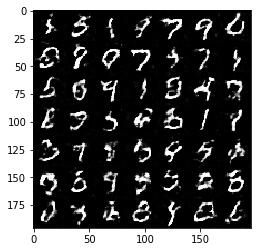

Epoch 1/2... Discriminator Loss: 1.1575... Generator Loss: 0.5045
Epoch 1/2... Discriminator Loss: 3.0211... Generator Loss: 0.0728
Epoch 1/2... Discriminator Loss: 0.8597... Generator Loss: 0.7864
Epoch 2/2... Discriminator Loss: 0.7834... Generator Loss: 0.8180
Epoch 2/2... Discriminator Loss: 0.4269... Generator Loss: 1.9853
Epoch 2/2... Discriminator Loss: 0.5370... Generator Loss: 1.3392
Epoch 2/2... Discriminator Loss: 1.6285... Generator Loss: 0.3073
Epoch 2/2... Discriminator Loss: 0.6871... Generator Loss: 1.1028
Epoch 2/2... Discriminator Loss: 0.8198... Generator Loss: 0.8392
Epoch 2/2... Discriminator Loss: 1.8024... Generator Loss: 0.2200


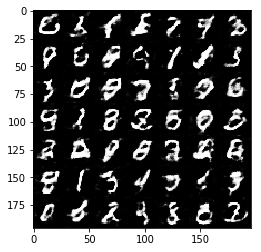

Epoch 2/2... Discriminator Loss: 1.1544... Generator Loss: 0.5597
Epoch 2/2... Discriminator Loss: 0.5275... Generator Loss: 1.2325
Epoch 2/2... Discriminator Loss: 0.8910... Generator Loss: 0.6931
Epoch 2/2... Discriminator Loss: 0.7544... Generator Loss: 2.6409
Epoch 2/2... Discriminator Loss: 0.5528... Generator Loss: 1.6142
Epoch 2/2... Discriminator Loss: 1.0404... Generator Loss: 0.5522
Epoch 2/2... Discriminator Loss: 1.4638... Generator Loss: 0.3335
Epoch 2/2... Discriminator Loss: 1.3689... Generator Loss: 0.4232
Epoch 2/2... Discriminator Loss: 0.7696... Generator Loss: 0.9525
Epoch 2/2... Discriminator Loss: 0.9585... Generator Loss: 0.6690


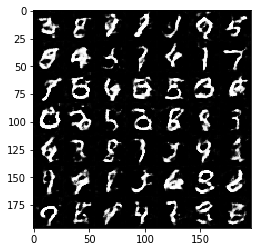

Epoch 2/2... Discriminator Loss: 2.0097... Generator Loss: 0.2557
Epoch 2/2... Discriminator Loss: 0.9061... Generator Loss: 0.8087
Epoch 2/2... Discriminator Loss: 0.5483... Generator Loss: 1.1929
Epoch 2/2... Discriminator Loss: 0.7876... Generator Loss: 0.7972
Epoch 2/2... Discriminator Loss: 2.3730... Generator Loss: 0.1384
Epoch 2/2... Discriminator Loss: 0.7957... Generator Loss: 0.8963
Epoch 2/2... Discriminator Loss: 0.7309... Generator Loss: 2.0231
Epoch 2/2... Discriminator Loss: 0.9713... Generator Loss: 0.6872
Epoch 2/2... Discriminator Loss: 0.8221... Generator Loss: 0.7579
Epoch 2/2... Discriminator Loss: 0.8169... Generator Loss: 0.8594


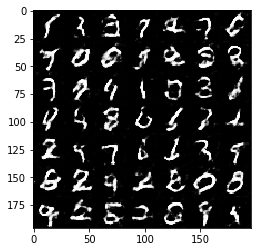

Epoch 2/2... Discriminator Loss: 0.5113... Generator Loss: 2.4288
Epoch 2/2... Discriminator Loss: 0.6847... Generator Loss: 2.6090
Epoch 2/2... Discriminator Loss: 1.2506... Generator Loss: 0.5166
Epoch 2/2... Discriminator Loss: 1.3428... Generator Loss: 0.4625
Epoch 2/2... Discriminator Loss: 0.6304... Generator Loss: 1.1155
Epoch 2/2... Discriminator Loss: 0.7089... Generator Loss: 1.2039
Epoch 2/2... Discriminator Loss: 0.6677... Generator Loss: 1.4706
Epoch 2/2... Discriminator Loss: 0.6975... Generator Loss: 2.0883
Epoch 2/2... Discriminator Loss: 0.7599... Generator Loss: 0.9191
Epoch 2/2... Discriminator Loss: 0.5681... Generator Loss: 1.3311


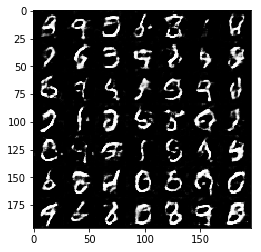

Epoch 2/2... Discriminator Loss: 0.9352... Generator Loss: 0.6412
Epoch 2/2... Discriminator Loss: 0.6478... Generator Loss: 1.3383
Epoch 2/2... Discriminator Loss: 1.2597... Generator Loss: 0.4934
Epoch 2/2... Discriminator Loss: 2.4409... Generator Loss: 0.1661
Epoch 2/2... Discriminator Loss: 2.2265... Generator Loss: 0.1611
Epoch 2/2... Discriminator Loss: 0.7965... Generator Loss: 0.8849
Epoch 2/2... Discriminator Loss: 0.4928... Generator Loss: 2.4674
Epoch 2/2... Discriminator Loss: 0.5439... Generator Loss: 1.5051
Epoch 2/2... Discriminator Loss: 0.4483... Generator Loss: 1.7163
Epoch 2/2... Discriminator Loss: 2.4574... Generator Loss: 4.3670


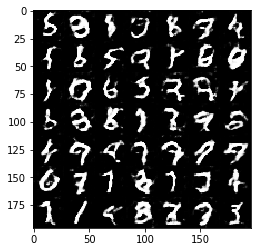

Epoch 2/2... Discriminator Loss: 0.8115... Generator Loss: 0.7555
Epoch 2/2... Discriminator Loss: 2.0301... Generator Loss: 0.2479
Epoch 2/2... Discriminator Loss: 1.0297... Generator Loss: 0.6226
Epoch 2/2... Discriminator Loss: 0.5747... Generator Loss: 1.0923
Epoch 2/2... Discriminator Loss: 0.8084... Generator Loss: 0.8027
Epoch 2/2... Discriminator Loss: 4.1572... Generator Loss: 6.5733
Epoch 2/2... Discriminator Loss: 0.8317... Generator Loss: 2.0183
Epoch 2/2... Discriminator Loss: 0.6960... Generator Loss: 1.1000
Epoch 2/2... Discriminator Loss: 1.0091... Generator Loss: 0.6059
Epoch 2/2... Discriminator Loss: 0.9043... Generator Loss: 0.7335


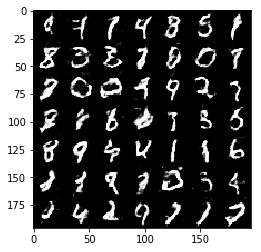

Epoch 2/2... Discriminator Loss: 0.9351... Generator Loss: 0.7318
Epoch 2/2... Discriminator Loss: 0.7058... Generator Loss: 0.9955
Epoch 2/2... Discriminator Loss: 0.4937... Generator Loss: 1.3889
Epoch 2/2... Discriminator Loss: 0.6690... Generator Loss: 0.9008
Epoch 2/2... Discriminator Loss: 0.9293... Generator Loss: 0.6532
Epoch 2/2... Discriminator Loss: 0.5386... Generator Loss: 1.9834
Epoch 2/2... Discriminator Loss: 0.7090... Generator Loss: 1.0723
Epoch 2/2... Discriminator Loss: 0.6226... Generator Loss: 1.0725
Epoch 2/2... Discriminator Loss: 0.9934... Generator Loss: 0.6687
Epoch 2/2... Discriminator Loss: 0.6953... Generator Loss: 1.0402


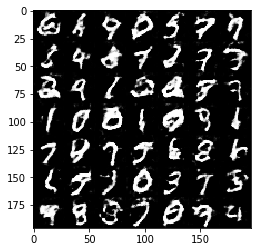

Epoch 2/2... Discriminator Loss: 1.0466... Generator Loss: 2.0361
Epoch 2/2... Discriminator Loss: 0.7825... Generator Loss: 2.4422
Epoch 2/2... Discriminator Loss: 0.7162... Generator Loss: 0.9871
Epoch 2/2... Discriminator Loss: 0.8737... Generator Loss: 0.7299
Epoch 2/2... Discriminator Loss: 0.8162... Generator Loss: 0.7670
Epoch 2/2... Discriminator Loss: 0.8272... Generator Loss: 0.8023
Epoch 2/2... Discriminator Loss: 0.7916... Generator Loss: 0.8211
Epoch 2/2... Discriminator Loss: 0.6321... Generator Loss: 0.9812
Epoch 2/2... Discriminator Loss: 0.6230... Generator Loss: 0.9592
Epoch 2/2... Discriminator Loss: 1.1059... Generator Loss: 0.5119


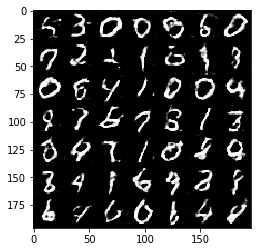

Epoch 2/2... Discriminator Loss: 0.6999... Generator Loss: 0.9432
Epoch 2/2... Discriminator Loss: 0.9545... Generator Loss: 1.7192
Epoch 2/2... Discriminator Loss: 0.8676... Generator Loss: 2.2432
Epoch 2/2... Discriminator Loss: 0.7477... Generator Loss: 0.8994
Epoch 2/2... Discriminator Loss: 0.6783... Generator Loss: 1.0669
Epoch 2/2... Discriminator Loss: 1.0454... Generator Loss: 0.6390
Epoch 2/2... Discriminator Loss: 0.6913... Generator Loss: 0.9286
Epoch 2/2... Discriminator Loss: 1.2820... Generator Loss: 0.5089
Epoch 2/2... Discriminator Loss: 0.6912... Generator Loss: 0.9446
Epoch 2/2... Discriminator Loss: 0.7979... Generator Loss: 2.2887


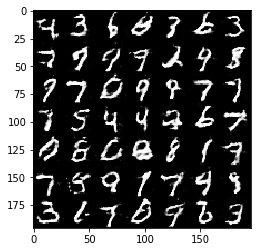

Epoch 2/2... Discriminator Loss: 0.5580... Generator Loss: 1.5531
Epoch 2/2... Discriminator Loss: 0.8201... Generator Loss: 0.9014
Epoch 2/2... Discriminator Loss: 0.5786... Generator Loss: 1.5227
Epoch 2/2... Discriminator Loss: 0.8039... Generator Loss: 0.8298
Epoch 2/2... Discriminator Loss: 0.5619... Generator Loss: 1.7803
Epoch 2/2... Discriminator Loss: 0.5598... Generator Loss: 1.5711
Epoch 2/2... Discriminator Loss: 0.3922... Generator Loss: 1.6302


In [20]:
batch_size = 64
z_dim = 128
learning_rate = 0.0005
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.1299... Generator Loss: 3.6821
Epoch 1/1... Discriminator Loss: 0.0674... Generator Loss: 3.3090
Epoch 1/1... Discriminator Loss: 0.4529... Generator Loss: 11.0704
Epoch 1/1... Discriminator Loss: 0.4508... Generator Loss: 9.3122
Epoch 1/1... Discriminator Loss: 0.2727... Generator Loss: 5.8406
Epoch 1/1... Discriminator Loss: 0.1183... Generator Loss: 7.2575
Epoch 1/1... Discriminator Loss: 0.5741... Generator Loss: 1.0579
Epoch 1/1... Discriminator Loss: 0.2725... Generator Loss: 2.0014
Epoch 1/1... Discriminator Loss: 0.3776... Generator Loss: 5.4890
Epoch 1/1... Discriminator Loss: 0.6910... Generator Loss: 1.0106


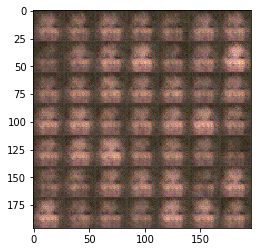

Epoch 1/1... Discriminator Loss: 2.1571... Generator Loss: 8.1870
Epoch 1/1... Discriminator Loss: 0.8832... Generator Loss: 0.6646
Epoch 1/1... Discriminator Loss: 0.7948... Generator Loss: 0.7201
Epoch 1/1... Discriminator Loss: 0.3847... Generator Loss: 1.6051
Epoch 1/1... Discriminator Loss: 0.3942... Generator Loss: 1.8601
Epoch 1/1... Discriminator Loss: 0.4898... Generator Loss: 2.2939
Epoch 1/1... Discriminator Loss: 0.7975... Generator Loss: 0.7990
Epoch 1/1... Discriminator Loss: 0.4668... Generator Loss: 1.3281
Epoch 1/1... Discriminator Loss: 0.5626... Generator Loss: 1.3181
Epoch 1/1... Discriminator Loss: 0.9160... Generator Loss: 4.4012


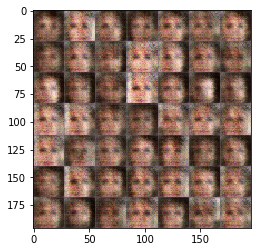

Epoch 1/1... Discriminator Loss: 1.3979... Generator Loss: 0.3695
Epoch 1/1... Discriminator Loss: 1.9373... Generator Loss: 0.2037
Epoch 1/1... Discriminator Loss: 0.3521... Generator Loss: 1.8194
Epoch 1/1... Discriminator Loss: 0.8010... Generator Loss: 0.7948
Epoch 1/1... Discriminator Loss: 0.4714... Generator Loss: 3.6604
Epoch 1/1... Discriminator Loss: 0.4715... Generator Loss: 1.3226
Epoch 1/1... Discriminator Loss: 0.4079... Generator Loss: 2.3379
Epoch 1/1... Discriminator Loss: 0.5256... Generator Loss: 1.1787
Epoch 1/1... Discriminator Loss: 0.6445... Generator Loss: 5.8888
Epoch 1/1... Discriminator Loss: 1.7959... Generator Loss: 0.2375


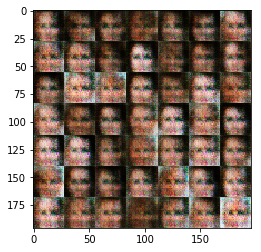

Epoch 1/1... Discriminator Loss: 1.0581... Generator Loss: 6.2125
Epoch 1/1... Discriminator Loss: 0.5646... Generator Loss: 1.2368
Epoch 1/1... Discriminator Loss: 0.7371... Generator Loss: 1.0058
Epoch 1/1... Discriminator Loss: 0.5356... Generator Loss: 1.1806
Epoch 1/1... Discriminator Loss: 2.7502... Generator Loss: 0.1027
Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 0.4288
Epoch 1/1... Discriminator Loss: 1.2231... Generator Loss: 3.6485
Epoch 1/1... Discriminator Loss: 0.6583... Generator Loss: 2.2570
Epoch 1/1... Discriminator Loss: 0.6272... Generator Loss: 2.1195
Epoch 1/1... Discriminator Loss: 0.7101... Generator Loss: 1.2065


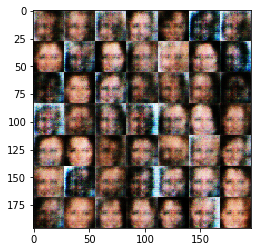

Epoch 1/1... Discriminator Loss: 0.8957... Generator Loss: 0.7395
Epoch 1/1... Discriminator Loss: 1.5814... Generator Loss: 0.3277
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 0.4614
Epoch 1/1... Discriminator Loss: 1.3368... Generator Loss: 0.4607
Epoch 1/1... Discriminator Loss: 0.8324... Generator Loss: 2.1542
Epoch 1/1... Discriminator Loss: 0.6364... Generator Loss: 2.2767
Epoch 1/1... Discriminator Loss: 1.5187... Generator Loss: 5.8548
Epoch 1/1... Discriminator Loss: 0.4890... Generator Loss: 3.1509
Epoch 1/1... Discriminator Loss: 0.6283... Generator Loss: 1.2188
Epoch 1/1... Discriminator Loss: 0.9961... Generator Loss: 0.6179


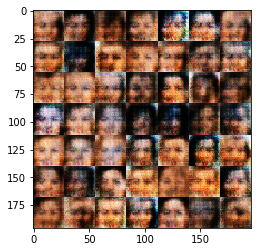

Epoch 1/1... Discriminator Loss: 0.7541... Generator Loss: 4.2848
Epoch 1/1... Discriminator Loss: 1.3407... Generator Loss: 0.4372
Epoch 1/1... Discriminator Loss: 1.9180... Generator Loss: 0.2233
Epoch 1/1... Discriminator Loss: 1.6612... Generator Loss: 0.2978
Epoch 1/1... Discriminator Loss: 0.9314... Generator Loss: 0.7541
Epoch 1/1... Discriminator Loss: 1.1786... Generator Loss: 0.5280
Epoch 1/1... Discriminator Loss: 1.1595... Generator Loss: 0.5184
Epoch 1/1... Discriminator Loss: 1.1092... Generator Loss: 0.5359
Epoch 1/1... Discriminator Loss: 0.9135... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 0.7687... Generator Loss: 1.0135


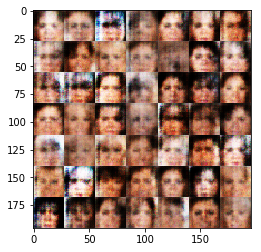

Epoch 1/1... Discriminator Loss: 1.2127... Generator Loss: 0.4882
Epoch 1/1... Discriminator Loss: 1.1206... Generator Loss: 0.5789
Epoch 1/1... Discriminator Loss: 1.3422... Generator Loss: 0.3943
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.4029
Epoch 1/1... Discriminator Loss: 1.2437... Generator Loss: 0.4905
Epoch 1/1... Discriminator Loss: 1.6090... Generator Loss: 0.3333
Epoch 1/1... Discriminator Loss: 1.1670... Generator Loss: 0.5527
Epoch 1/1... Discriminator Loss: 1.2514... Generator Loss: 0.4903
Epoch 1/1... Discriminator Loss: 1.2321... Generator Loss: 0.5913
Epoch 1/1... Discriminator Loss: 1.6461... Generator Loss: 3.8703


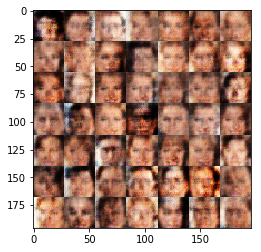

Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.4025
Epoch 1/1... Discriminator Loss: 1.9071... Generator Loss: 0.2279
Epoch 1/1... Discriminator Loss: 1.6394... Generator Loss: 0.2948
Epoch 1/1... Discriminator Loss: 1.4472... Generator Loss: 0.3795
Epoch 1/1... Discriminator Loss: 1.1327... Generator Loss: 0.6074
Epoch 1/1... Discriminator Loss: 1.1595... Generator Loss: 0.5143
Epoch 1/1... Discriminator Loss: 0.9634... Generator Loss: 0.7332
Epoch 1/1... Discriminator Loss: 1.0395... Generator Loss: 0.5623
Epoch 1/1... Discriminator Loss: 1.4846... Generator Loss: 0.3993
Epoch 1/1... Discriminator Loss: 1.1592... Generator Loss: 0.5167


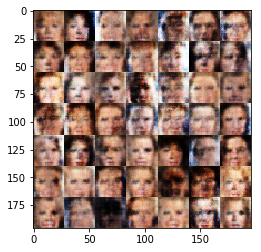

Epoch 1/1... Discriminator Loss: 0.9184... Generator Loss: 0.7292
Epoch 1/1... Discriminator Loss: 0.8110... Generator Loss: 2.2975
Epoch 1/1... Discriminator Loss: 0.7297... Generator Loss: 1.3844
Epoch 1/1... Discriminator Loss: 0.7306... Generator Loss: 1.3893
Epoch 1/1... Discriminator Loss: 0.7210... Generator Loss: 2.0544
Epoch 1/1... Discriminator Loss: 0.8963... Generator Loss: 0.8499
Epoch 1/1... Discriminator Loss: 1.2752... Generator Loss: 0.4725
Epoch 1/1... Discriminator Loss: 1.9368... Generator Loss: 0.2076
Epoch 1/1... Discriminator Loss: 1.0583... Generator Loss: 0.7052
Epoch 1/1... Discriminator Loss: 1.4472... Generator Loss: 0.3695


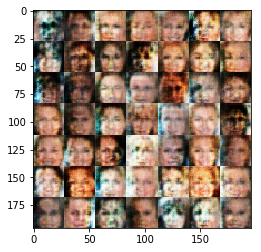

Epoch 1/1... Discriminator Loss: 1.5454... Generator Loss: 0.3481
Epoch 1/1... Discriminator Loss: 2.2053... Generator Loss: 0.1724
Epoch 1/1... Discriminator Loss: 1.2895... Generator Loss: 0.4506
Epoch 1/1... Discriminator Loss: 1.2488... Generator Loss: 0.4852
Epoch 1/1... Discriminator Loss: 1.4663... Generator Loss: 0.3482
Epoch 1/1... Discriminator Loss: 1.2888... Generator Loss: 0.4519
Epoch 1/1... Discriminator Loss: 1.0251... Generator Loss: 0.6727
Epoch 1/1... Discriminator Loss: 0.9202... Generator Loss: 2.5192
Epoch 1/1... Discriminator Loss: 0.7275... Generator Loss: 1.7775
Epoch 1/1... Discriminator Loss: 0.7643... Generator Loss: 1.7812


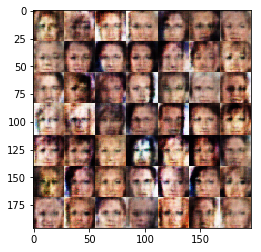

Epoch 1/1... Discriminator Loss: 0.8212... Generator Loss: 1.5292
Epoch 1/1... Discriminator Loss: 0.8182... Generator Loss: 2.1248
Epoch 1/1... Discriminator Loss: 0.9003... Generator Loss: 1.0302
Epoch 1/1... Discriminator Loss: 0.8320... Generator Loss: 2.0486
Epoch 1/1... Discriminator Loss: 0.7734... Generator Loss: 1.2801
Epoch 1/1... Discriminator Loss: 0.9594... Generator Loss: 2.7105
Epoch 1/1... Discriminator Loss: 1.2445... Generator Loss: 2.9303
Epoch 1/1... Discriminator Loss: 1.3628... Generator Loss: 2.4971
Epoch 1/1... Discriminator Loss: 0.7562... Generator Loss: 1.5553
Epoch 1/1... Discriminator Loss: 0.7940... Generator Loss: 2.1620


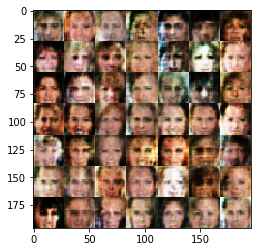

Epoch 1/1... Discriminator Loss: 1.0309... Generator Loss: 2.0548
Epoch 1/1... Discriminator Loss: 0.8859... Generator Loss: 1.9939
Epoch 1/1... Discriminator Loss: 0.9300... Generator Loss: 2.5761
Epoch 1/1... Discriminator Loss: 0.8546... Generator Loss: 1.6267
Epoch 1/1... Discriminator Loss: 1.0283... Generator Loss: 0.6233
Epoch 1/1... Discriminator Loss: 1.0877... Generator Loss: 0.6028
Epoch 1/1... Discriminator Loss: 1.2233... Generator Loss: 0.4937
Epoch 1/1... Discriminator Loss: 1.1945... Generator Loss: 0.5203
Epoch 1/1... Discriminator Loss: 0.9753... Generator Loss: 2.0072
Epoch 1/1... Discriminator Loss: 0.8537... Generator Loss: 2.2761


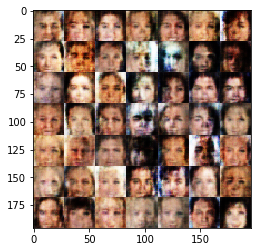

Epoch 1/1... Discriminator Loss: 0.8027... Generator Loss: 1.9504
Epoch 1/1... Discriminator Loss: 0.8746... Generator Loss: 1.2724
Epoch 1/1... Discriminator Loss: 0.9249... Generator Loss: 1.9381
Epoch 1/1... Discriminator Loss: 0.8992... Generator Loss: 1.6857
Epoch 1/1... Discriminator Loss: 0.9270... Generator Loss: 1.9831
Epoch 1/1... Discriminator Loss: 0.8046... Generator Loss: 1.4697
Epoch 1/1... Discriminator Loss: 1.1649... Generator Loss: 0.5491
Epoch 1/1... Discriminator Loss: 1.1840... Generator Loss: 0.5645
Epoch 1/1... Discriminator Loss: 0.8275... Generator Loss: 1.1743
Epoch 1/1... Discriminator Loss: 1.1333... Generator Loss: 2.1707


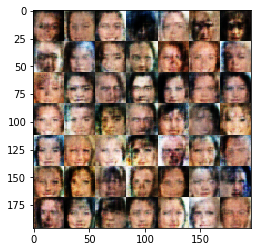

Epoch 1/1... Discriminator Loss: 0.7835... Generator Loss: 1.4557
Epoch 1/1... Discriminator Loss: 0.8164... Generator Loss: 1.1110
Epoch 1/1... Discriminator Loss: 1.0753... Generator Loss: 2.4922
Epoch 1/1... Discriminator Loss: 0.7623... Generator Loss: 1.3634
Epoch 1/1... Discriminator Loss: 0.8443... Generator Loss: 1.0034
Epoch 1/1... Discriminator Loss: 0.9141... Generator Loss: 0.8642
Epoch 1/1... Discriminator Loss: 1.5631... Generator Loss: 0.3182
Epoch 1/1... Discriminator Loss: 1.2921... Generator Loss: 0.4329
Epoch 1/1... Discriminator Loss: 1.0745... Generator Loss: 0.6846
Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.3692


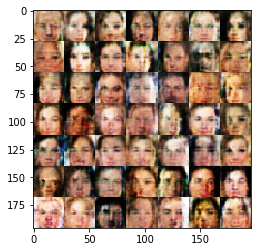

Epoch 1/1... Discriminator Loss: 2.0567... Generator Loss: 0.1978
Epoch 1/1... Discriminator Loss: 1.2958... Generator Loss: 0.4455
Epoch 1/1... Discriminator Loss: 0.7866... Generator Loss: 1.3261
Epoch 1/1... Discriminator Loss: 1.0177... Generator Loss: 0.6280
Epoch 1/1... Discriminator Loss: 0.8521... Generator Loss: 1.2960
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 3.0645
Epoch 1/1... Discriminator Loss: 0.9293... Generator Loss: 0.8739
Epoch 1/1... Discriminator Loss: 1.5003... Generator Loss: 0.3437
Epoch 1/1... Discriminator Loss: 1.2446... Generator Loss: 0.4991
Epoch 1/1... Discriminator Loss: 1.1015... Generator Loss: 0.5811


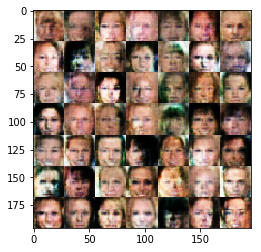

Epoch 1/1... Discriminator Loss: 0.8952... Generator Loss: 0.8226
Epoch 1/1... Discriminator Loss: 1.0958... Generator Loss: 0.5678
Epoch 1/1... Discriminator Loss: 1.2384... Generator Loss: 0.4767
Epoch 1/1... Discriminator Loss: 0.8313... Generator Loss: 1.1519
Epoch 1/1... Discriminator Loss: 1.0174... Generator Loss: 2.1848
Epoch 1/1... Discriminator Loss: 1.2271... Generator Loss: 0.4563
Epoch 1/1... Discriminator Loss: 0.9855... Generator Loss: 2.5491
Epoch 1/1... Discriminator Loss: 0.8285... Generator Loss: 1.6232
Epoch 1/1... Discriminator Loss: 0.8484... Generator Loss: 1.6425
Epoch 1/1... Discriminator Loss: 0.8214... Generator Loss: 1.5840


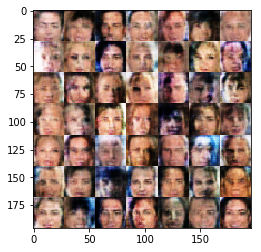

Epoch 1/1... Discriminator Loss: 0.8617... Generator Loss: 0.9557
Epoch 1/1... Discriminator Loss: 2.1851... Generator Loss: 0.1526
Epoch 1/1... Discriminator Loss: 1.6598... Generator Loss: 0.3062
Epoch 1/1... Discriminator Loss: 0.9347... Generator Loss: 1.1316
Epoch 1/1... Discriminator Loss: 1.0795... Generator Loss: 2.4026
Epoch 1/1... Discriminator Loss: 0.9595... Generator Loss: 0.7838
Epoch 1/1... Discriminator Loss: 0.8541... Generator Loss: 0.9253
Epoch 1/1... Discriminator Loss: 1.0705... Generator Loss: 0.6346
Epoch 1/1... Discriminator Loss: 1.7306... Generator Loss: 0.2697
Epoch 1/1... Discriminator Loss: 0.7782... Generator Loss: 1.7207


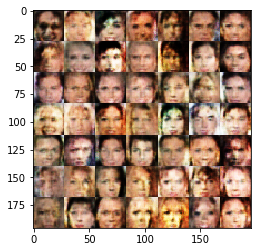

Epoch 1/1... Discriminator Loss: 0.8788... Generator Loss: 0.8598
Epoch 1/1... Discriminator Loss: 0.9714... Generator Loss: 1.5378
Epoch 1/1... Discriminator Loss: 1.0326... Generator Loss: 2.3866
Epoch 1/1... Discriminator Loss: 1.0596... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 0.9814... Generator Loss: 2.7535
Epoch 1/1... Discriminator Loss: 0.8711... Generator Loss: 1.0383
Epoch 1/1... Discriminator Loss: 0.7302... Generator Loss: 1.2080
Epoch 1/1... Discriminator Loss: 1.0257... Generator Loss: 2.3550
Epoch 1/1... Discriminator Loss: 0.8550... Generator Loss: 1.2815
Epoch 1/1... Discriminator Loss: 0.8585... Generator Loss: 0.9172


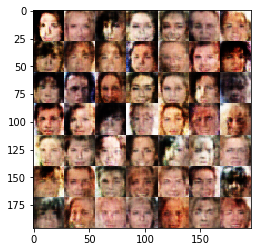

Epoch 1/1... Discriminator Loss: 1.5284... Generator Loss: 0.3451
Epoch 1/1... Discriminator Loss: 1.4126... Generator Loss: 0.3814
Epoch 1/1... Discriminator Loss: 0.6720... Generator Loss: 1.5616
Epoch 1/1... Discriminator Loss: 1.7788... Generator Loss: 0.2434
Epoch 1/1... Discriminator Loss: 0.8902... Generator Loss: 1.0427
Epoch 1/1... Discriminator Loss: 1.1705... Generator Loss: 0.5077
Epoch 1/1... Discriminator Loss: 1.3508... Generator Loss: 0.4718
Epoch 1/1... Discriminator Loss: 1.3172... Generator Loss: 0.4392
Epoch 1/1... Discriminator Loss: 1.1556... Generator Loss: 0.4902
Epoch 1/1... Discriminator Loss: 0.9901... Generator Loss: 0.7944


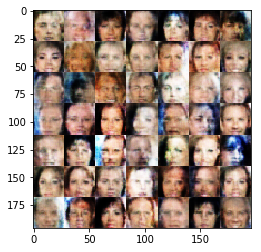

Epoch 1/1... Discriminator Loss: 0.9446... Generator Loss: 1.3637
Epoch 1/1... Discriminator Loss: 1.3183... Generator Loss: 0.4132
Epoch 1/1... Discriminator Loss: 1.2685... Generator Loss: 0.4313
Epoch 1/1... Discriminator Loss: 0.7686... Generator Loss: 1.1172
Epoch 1/1... Discriminator Loss: 1.8729... Generator Loss: 0.2241
Epoch 1/1... Discriminator Loss: 0.7931... Generator Loss: 1.3125
Epoch 1/1... Discriminator Loss: 0.8274... Generator Loss: 2.0133
Epoch 1/1... Discriminator Loss: 0.3918... Generator Loss: 1.8396
Epoch 1/1... Discriminator Loss: 1.3088... Generator Loss: 0.4284
Epoch 1/1... Discriminator Loss: 1.4873... Generator Loss: 0.3398


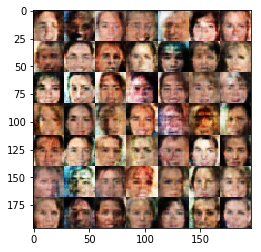

Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.3904
Epoch 1/1... Discriminator Loss: 0.8187... Generator Loss: 1.3558
Epoch 1/1... Discriminator Loss: 1.8434... Generator Loss: 0.2336
Epoch 1/1... Discriminator Loss: 1.2445... Generator Loss: 0.4602
Epoch 1/1... Discriminator Loss: 0.6297... Generator Loss: 1.1964
Epoch 1/1... Discriminator Loss: 0.9683... Generator Loss: 2.6112
Epoch 1/1... Discriminator Loss: 1.0040... Generator Loss: 2.3609
Epoch 1/1... Discriminator Loss: 1.9376... Generator Loss: 0.2094
Epoch 1/1... Discriminator Loss: 1.4518... Generator Loss: 0.3995
Epoch 1/1... Discriminator Loss: 0.8706... Generator Loss: 0.9551


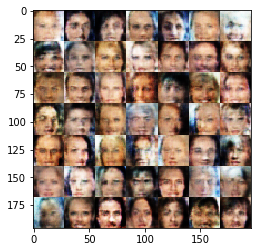

Epoch 1/1... Discriminator Loss: 0.9968... Generator Loss: 1.3079
Epoch 1/1... Discriminator Loss: 0.9662... Generator Loss: 0.8832
Epoch 1/1... Discriminator Loss: 1.1466... Generator Loss: 0.5228
Epoch 1/1... Discriminator Loss: 1.0192... Generator Loss: 0.8651
Epoch 1/1... Discriminator Loss: 0.9561... Generator Loss: 2.3954
Epoch 1/1... Discriminator Loss: 0.6979... Generator Loss: 1.6774
Epoch 1/1... Discriminator Loss: 0.7645... Generator Loss: 2.0604
Epoch 1/1... Discriminator Loss: 1.1291... Generator Loss: 1.9605
Epoch 1/1... Discriminator Loss: 0.8792... Generator Loss: 1.3868
Epoch 1/1... Discriminator Loss: 1.1484... Generator Loss: 3.1746


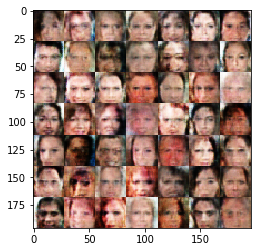

Epoch 1/1... Discriminator Loss: 0.8570... Generator Loss: 1.5609
Epoch 1/1... Discriminator Loss: 1.1271... Generator Loss: 0.5477
Epoch 1/1... Discriminator Loss: 1.6606... Generator Loss: 0.2886
Epoch 1/1... Discriminator Loss: 1.8155... Generator Loss: 0.2769
Epoch 1/1... Discriminator Loss: 0.9917... Generator Loss: 0.7217
Epoch 1/1... Discriminator Loss: 1.5414... Generator Loss: 0.3434
Epoch 1/1... Discriminator Loss: 0.9745... Generator Loss: 0.8251
Epoch 1/1... Discriminator Loss: 1.1570... Generator Loss: 0.5376
Epoch 1/1... Discriminator Loss: 0.5988... Generator Loss: 1.6472
Epoch 1/1... Discriminator Loss: 0.7264... Generator Loss: 2.4890


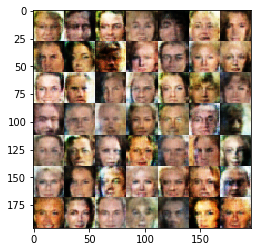

Epoch 1/1... Discriminator Loss: 0.8477... Generator Loss: 0.8715
Epoch 1/1... Discriminator Loss: 0.6489... Generator Loss: 1.3387
Epoch 1/1... Discriminator Loss: 0.8287... Generator Loss: 1.9526
Epoch 1/1... Discriminator Loss: 0.7503... Generator Loss: 1.8103
Epoch 1/1... Discriminator Loss: 0.7238... Generator Loss: 2.0177
Epoch 1/1... Discriminator Loss: 0.8147... Generator Loss: 1.1744
Epoch 1/1... Discriminator Loss: 0.7300... Generator Loss: 1.2056
Epoch 1/1... Discriminator Loss: 1.1554... Generator Loss: 2.7287
Epoch 1/1... Discriminator Loss: 0.8752... Generator Loss: 0.7530
Epoch 1/1... Discriminator Loss: 1.0260... Generator Loss: 0.5984


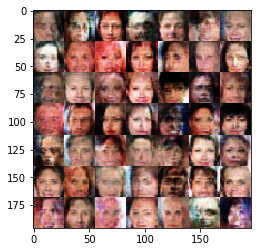

Epoch 1/1... Discriminator Loss: 1.1874... Generator Loss: 0.5499
Epoch 1/1... Discriminator Loss: 1.9743... Generator Loss: 0.2116
Epoch 1/1... Discriminator Loss: 0.8955... Generator Loss: 2.2857
Epoch 1/1... Discriminator Loss: 0.7250... Generator Loss: 1.6016
Epoch 1/1... Discriminator Loss: 0.7284... Generator Loss: 1.4585
Epoch 1/1... Discriminator Loss: 0.8971... Generator Loss: 1.4292
Epoch 1/1... Discriminator Loss: 1.6027... Generator Loss: 0.3082
Epoch 1/1... Discriminator Loss: 1.0193... Generator Loss: 0.7002
Epoch 1/1... Discriminator Loss: 1.3152... Generator Loss: 0.4033
Epoch 1/1... Discriminator Loss: 1.5556... Generator Loss: 0.3043


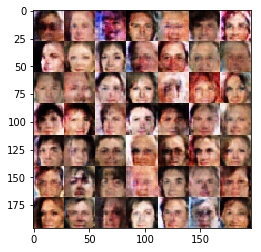

Epoch 1/1... Discriminator Loss: 2.1176... Generator Loss: 0.1617
Epoch 1/1... Discriminator Loss: 1.2509... Generator Loss: 0.4592
Epoch 1/1... Discriminator Loss: 0.9932... Generator Loss: 0.6346
Epoch 1/1... Discriminator Loss: 0.7525... Generator Loss: 1.9277
Epoch 1/1... Discriminator Loss: 0.9486... Generator Loss: 2.1826
Epoch 1/1... Discriminator Loss: 0.7597... Generator Loss: 1.2111
Epoch 1/1... Discriminator Loss: 0.8551... Generator Loss: 1.4284
Epoch 1/1... Discriminator Loss: 0.7967... Generator Loss: 0.9440
Epoch 1/1... Discriminator Loss: 0.8637... Generator Loss: 1.3395
Epoch 1/1... Discriminator Loss: 0.8051... Generator Loss: 1.1298


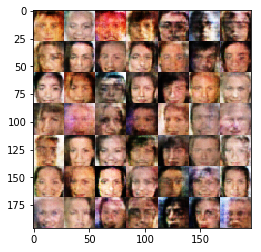

Epoch 1/1... Discriminator Loss: 1.9109... Generator Loss: 0.2149
Epoch 1/1... Discriminator Loss: 1.0781... Generator Loss: 0.6689
Epoch 1/1... Discriminator Loss: 1.1436... Generator Loss: 0.4971
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.4473
Epoch 1/1... Discriminator Loss: 0.9512... Generator Loss: 0.9394
Epoch 1/1... Discriminator Loss: 0.8919... Generator Loss: 2.1699
Epoch 1/1... Discriminator Loss: 0.9061... Generator Loss: 1.9324
Epoch 1/1... Discriminator Loss: 0.6878... Generator Loss: 1.7815
Epoch 1/1... Discriminator Loss: 0.9819... Generator Loss: 0.6852
Epoch 1/1... Discriminator Loss: 1.1261... Generator Loss: 0.5074


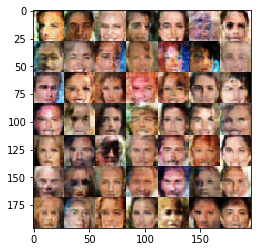

Epoch 1/1... Discriminator Loss: 1.0092... Generator Loss: 0.6576
Epoch 1/1... Discriminator Loss: 1.2390... Generator Loss: 0.5193
Epoch 1/1... Discriminator Loss: 1.6181... Generator Loss: 0.2975
Epoch 1/1... Discriminator Loss: 1.0627... Generator Loss: 0.5875
Epoch 1/1... Discriminator Loss: 1.0783... Generator Loss: 2.7405
Epoch 1/1... Discriminator Loss: 0.8942... Generator Loss: 1.5838
Epoch 1/1... Discriminator Loss: 0.7807... Generator Loss: 0.9986
Epoch 1/1... Discriminator Loss: 1.5402... Generator Loss: 0.3162
Epoch 1/1... Discriminator Loss: 0.8333... Generator Loss: 1.0444
Epoch 1/1... Discriminator Loss: 0.8466... Generator Loss: 0.8140


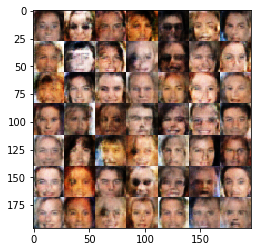

Epoch 1/1... Discriminator Loss: 1.9340... Generator Loss: 0.2323
Epoch 1/1... Discriminator Loss: 1.6740... Generator Loss: 0.2868
Epoch 1/1... Discriminator Loss: 0.6851... Generator Loss: 1.1258
Epoch 1/1... Discriminator Loss: 0.8451... Generator Loss: 1.7945
Epoch 1/1... Discriminator Loss: 1.1490... Generator Loss: 3.5439
Epoch 1/1... Discriminator Loss: 0.7028... Generator Loss: 1.5210
Epoch 1/1... Discriminator Loss: 0.6597... Generator Loss: 1.6244
Epoch 1/1... Discriminator Loss: 0.6816... Generator Loss: 1.3403
Epoch 1/1... Discriminator Loss: 0.9706... Generator Loss: 0.7789
Epoch 1/1... Discriminator Loss: 1.4299... Generator Loss: 0.3672


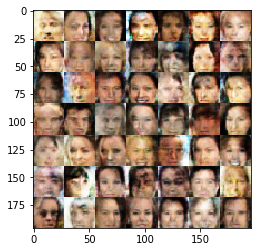

Epoch 1/1... Discriminator Loss: 0.9745... Generator Loss: 0.6795
Epoch 1/1... Discriminator Loss: 0.6961... Generator Loss: 1.0269
Epoch 1/1... Discriminator Loss: 1.2711... Generator Loss: 0.4872
Epoch 1/1... Discriminator Loss: 0.8988... Generator Loss: 2.3714
Epoch 1/1... Discriminator Loss: 0.7036... Generator Loss: 1.8146
Epoch 1/1... Discriminator Loss: 0.5928... Generator Loss: 2.1468
Epoch 1/1... Discriminator Loss: 1.1097... Generator Loss: 0.5447
Epoch 1/1... Discriminator Loss: 1.6583... Generator Loss: 0.2779
Epoch 1/1... Discriminator Loss: 0.8403... Generator Loss: 0.9526
Epoch 1/1... Discriminator Loss: 1.6090... Generator Loss: 0.3037


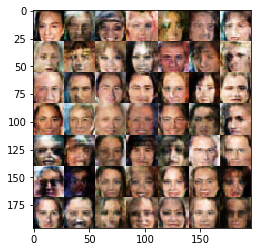

Epoch 1/1... Discriminator Loss: 1.1820... Generator Loss: 0.4973
Epoch 1/1... Discriminator Loss: 0.7806... Generator Loss: 0.9459
Epoch 1/1... Discriminator Loss: 1.4194... Generator Loss: 0.3805
Epoch 1/1... Discriminator Loss: 1.1186... Generator Loss: 2.4989
Epoch 1/1... Discriminator Loss: 0.6245... Generator Loss: 1.6774
Epoch 1/1... Discriminator Loss: 0.7538... Generator Loss: 1.6009
Epoch 1/1... Discriminator Loss: 0.7315... Generator Loss: 1.2840
Epoch 1/1... Discriminator Loss: 1.9055... Generator Loss: 0.2416
Epoch 1/1... Discriminator Loss: 0.8028... Generator Loss: 1.0065
Epoch 1/1... Discriminator Loss: 0.6641... Generator Loss: 1.5167


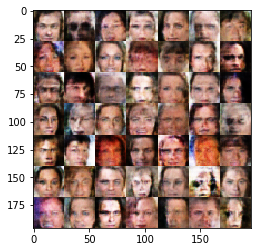

Epoch 1/1... Discriminator Loss: 1.5212... Generator Loss: 0.3456
Epoch 1/1... Discriminator Loss: 1.5315... Generator Loss: 0.3220
Epoch 1/1... Discriminator Loss: 1.2041... Generator Loss: 0.4863
Epoch 1/1... Discriminator Loss: 0.8314... Generator Loss: 0.8345
Epoch 1/1... Discriminator Loss: 1.8191... Generator Loss: 0.2475
Epoch 1/1... Discriminator Loss: 1.9561... Generator Loss: 0.2056


In [21]:
batch_size = 64
z_dim = 128
learning_rate = 0.0005
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.